<a href="https://colab.research.google.com/github/X4D0/MachineLearning/blob/main/Clustering_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tugas Besar 1
###MK Machine Learning 2020/2021

<b>Nama<b>: Rayhan Rahmanda<br> 
<b>NIM<b>: 1301184233

# Pre-Processing Data

### Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create Dataframe from the given Datasets

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset into Dataframe
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/salju_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/salju_test.csv')

# Drop Missing Values
df_test = df_test.dropna(axis = 0)
df_train = df_train.dropna(axis = 0)

# View Dataframe Info
print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7016 entries, 2 to 18180
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   7016 non-null   object 
 1   KodeLokasi                7016 non-null   object 
 2   SuhuMin                   7016 non-null   float64
 3   SuhuMax                   7016 non-null   float64
 4   Hujan                     7016 non-null   float64
 5   Penguapan                 7016 non-null   float64
 6   SinarMatahari             7016 non-null   float64
 7   ArahAnginTerkencang       7016 non-null   object 
 8   KecepatanAnginTerkencang  7016 non-null   float64
 9   ArahAngin9am              7016 non-null   object 
 10  ArahAngin3pm              7016 non-null   object 
 11  KecepatanAngin9am         7016 non-null   float64
 12  KecepatanAngin3pm         7016 non-null   float64
 13  Kelembaban9am             7016 non-null   float64
 14  Kelemba

Dari informasi diatas dapat dilihat bahwa terdapat perbedaan pada jumlah kolom nya, Dataframe Train memiliki 1 Kolom lebih yaitu Kolom id sehingga perlu di Drop atau dihilangkan. Lalu Gabungkan Data Train dan Data Test yang ada. Selain itu perlu dilakukan drop untuk atribut yang tidak berpengaruh dalam Clustering ini seperti Tanggal, KodeLokasi, dan beberapa atribut lain nya yang bertipe Object. Dikarenakan pada saat perhitungan Correlation Matrix membutuhkan kolom-kolom yang berisi Angka/Numerik maka Kolom BersaljuBesok perlu diubah dari yes/no menjadi 1/0.

In [ ]:
frames = [df_test, df_train.iloc[:,1:]]
df = pd.concat(frames)
df = df.drop(['Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni'], axis=1)
df = df.replace({'BersaljuBesok': {'Yes': 1, 'No': 0, 'Ya': 1, 'Tidak': 0}})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49427 entries, 2 to 109093
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   49427 non-null  float64
 1   SuhuMax                   49427 non-null  float64
 2   Hujan                     49427 non-null  float64
 3   Penguapan                 49427 non-null  float64
 4   SinarMatahari             49427 non-null  float64
 5   KecepatanAnginTerkencang  49427 non-null  float64
 6   KecepatanAngin9am         49427 non-null  float64
 7   KecepatanAngin3pm         49427 non-null  float64
 8   Kelembaban9am             49427 non-null  float64
 9   Kelembaban3pm             49427 non-null  float64
 10  Tekanan9am                49427 non-null  float64
 11  Tekanan3pm                49427 non-null  float64
 12  Awan9am                   49427 non-null  float64
 13  Awan3pm                   49427 non-null  float64
 14  Suhu9

Setelah itu kita perlu memilih atribut mana yang akan digunakan untuk Clustering. Dalam Hal ini Saya akan menggunakan Correlation Matrix untuk membantu menentukan variabel mana yang paling berpengaruh dalam memprediksi musim Salju di Hari esok.

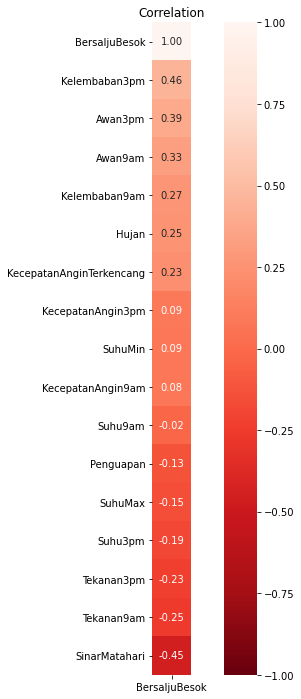

In [ ]:
# Correlation between all variables and the target
korelasi = df.corr()[['BersaljuBesok']]
plt.figure(figsize=(12, 12))
plt.title('Correlation')
sns.heatmap(korelasi.sort_values(by='BersaljuBesok', ascending=False), vmin=-1, vmax=1, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')

Setelah diketahui Attribut mana yang paling mempengaruhi Target/Kolom BersaljuBesok, maka selanjutnya Saya akan mengambil Kelembaban3pm dan Awan3pm yang akan digunakan sebagai Data.

In [ ]:
# Take two columns from df
dataframe = df[['Kelembaban3pm', 'Awan3pm']]
dataframe.reset_index(drop=True, inplace=True)
dataframe.head()

,Kelembaban3pm,Awan3pm
0,27.0,1.0
1,41.0,6.0
2,51.0,7.0
3,33.0,5.0
4,48.0,7.0


# Clustering

### 1. Convert Dataframe to Array

In [ ]:
X = np.array(dataframe)
X[:5]

array([[27.,  1.],
       [41.,  6.],
       [51.,  7.],
       [33.,  5.],
       [48.,  7.]])

### 2. Initialize Centroids Randomly

Dalam hal ini Saya akan membuat 2 (dua) buah Cluster yang berarti akan dibuat 2 buah centroids.

In [ ]:
# Generate Centroids
K = 2 # Initiate Clusters
centroids_awal = random.sample(range(0, len(dataframe)), K)
centroids_awal

[9763, 16178]

In [ ]:
# Get Centroid's Points
centroids = []
for i in centroids_awal:
    centroids.append(dataframe.loc[i])

# Convert them into a 2D Array
centroids = np.array(centroids)
centroids

array([[50.,  7.],
       [55.,  7.]])

### 3. Implement the Cluster

In [ ]:
# Calculate Distance Function using Euclidian
def hitung_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

# Find the Closest Centroids from the Data Point
def close_centroids(centroids, X):
  data_centroid = []
  for i in X:
      distance=[]
      for j in centroids:
          distance.append(hitung_distance(i, j))
      data_centroid.append(np.argmin(distance))
  return data_centroid

centroidstiapdata = close_centroids(centroids, X)
centroidstiapdata[:20]

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

Dapat dilihat bahwa pada Array tersebut merupakan Centroid2 yang dimiliki oleh tiap Data yang ada di array X. Sebagai Contoh Data 1 memiliki Centroid yang index nya 0 yaitu Centroid berada pada Poin (24,7), dengan kata Lain Data 1 termasuk kedalam Cluster 1.

Selanjutnya hal yang perlu dilakukan adalah dengan memindahkan Centroid ke titik rata-rata dari semua data yang ada.

In [ ]:
# Move Centroids based on Data Points Mean/Average
def hitung_centroids(clusters, X):
    centroids_baru = []
    df_baru = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_baru['cluster']):
        cluster_now = df_baru[df_baru['cluster'] == c][df_baru.columns[:-1]]
        cluster_mean = cluster_now.mean(axis=0)
        centroids_baru.append(cluster_mean)
    return centroids_baru, df_baru

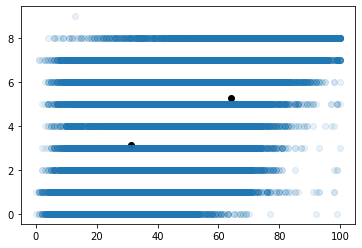

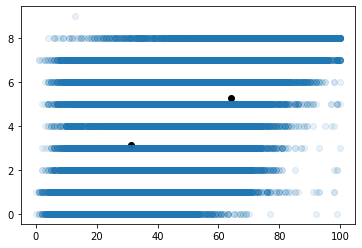

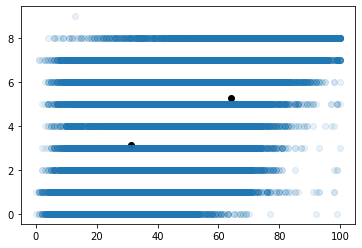

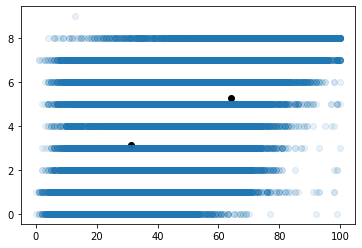

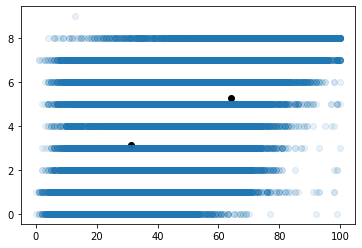

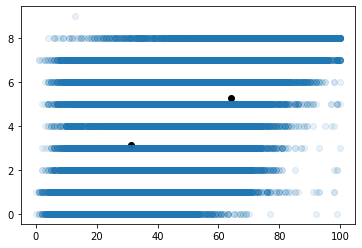

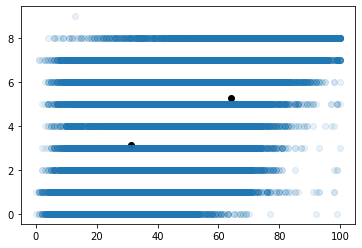

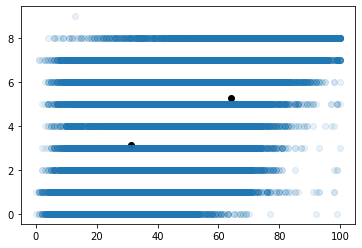

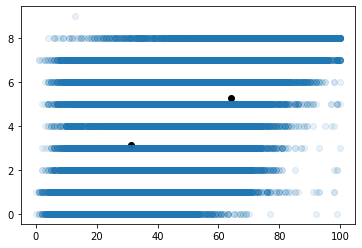

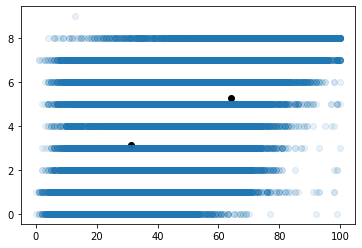

Hasil Clustering


,Kelembaban3pm,Awan3pm,Cluster
0,27.0,1.0,1
1,41.0,6.0,1
2,51.0,7.0,0
3,33.0,5.0,1
4,48.0,7.0,0
5,67.0,8.0,0
6,63.0,3.0,0
7,10.0,0.0,1
8,34.0,7.0,1
9,59.0,3.0,0


In [ ]:
iteration = 10
for i in range(iteration):
    get_centroids = close_centroids(centroids, X)
    centroids, df_new = hitung_centroids(get_centroids, X)
    hasil = np.array(df_new)
    centro = np.array(centroids)
    plt.figure()
    plt.scatter(centro[:, 0], centro[:, 1], color='black')
    plt.scatter(hasil[:, 0], hasil[:, 1], alpha=0.1)
    plt.show()
print("Hasil Clustering")
df_new.columns = ['Kelembaban3pm', 'Awan3pm', 'Cluster']
df_new.head(10)